### Завдання

Використовуючи модель ARIMA і датасет Yearly sunspots data 1700-2008 побудуйте прогноз на 2009-2030 р.р.


In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import itertools
import warnings
warnings.filterwarnings("ignore")

In [5]:
import statsmodels.datasets.sunspots as sd
df=sd.load_pandas()
df.data

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


### Трансформуємо датасет так, що б часові дані стали індексами.

In [6]:
df.data.index = pd.to_datetime(df.data['YEAR'], format='%Y')
df = df.data.drop(['YEAR'], axis=1)
df

,SUNACTIVITY
YEAR,
1700-01-01,5.0
1701-01-01,11.0
1702-01-01,16.0
1703-01-01,23.0
1704-01-01,36.0
...,...
2004-01-01,40.4
2005-01-01,29.8
2006-01-01,15.2


### Побудуємо график

<AxesSubplot: xlabel='YEAR'>

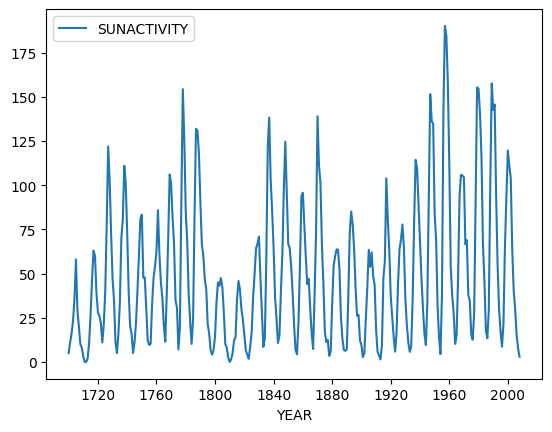

In [7]:
sns.lineplot(df)

In [11]:
df.describe()


,SUNACTIVITY
count,309.000000
mean,49.752104
std,40.452595
min,0.000000
25%,16.000000
50%,40.000000
75%,69.800000
max,190.200000


### Проведемо тест Дікі-Фуллера для визначення стаціонарності часового ряду

In [8]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(df, autolag="AIC")
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , 
                          "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                          "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)



       Values                       Metric
0   -2.837781              Test Statistics
1    0.053076                      p-value
2    8.000000             No. of lags used
3  300.000000  Number of observations used
4   -3.452337          critical value (1%)
5   -2.871223          critical value (5%)
6   -2.571929         critical value (10%)


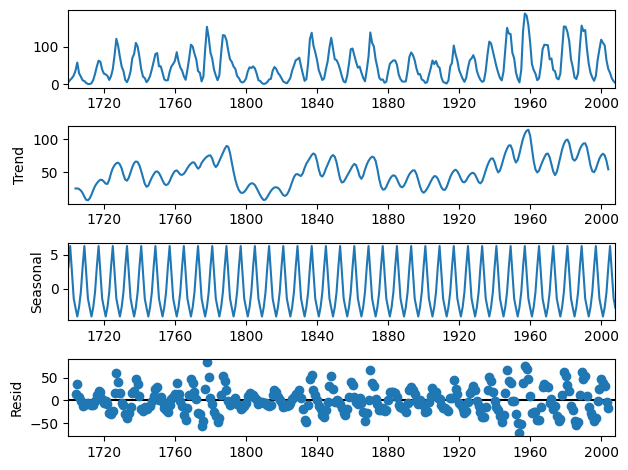

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df, model='additive',period=8)
fig = decomp.plot()
plt.show()

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

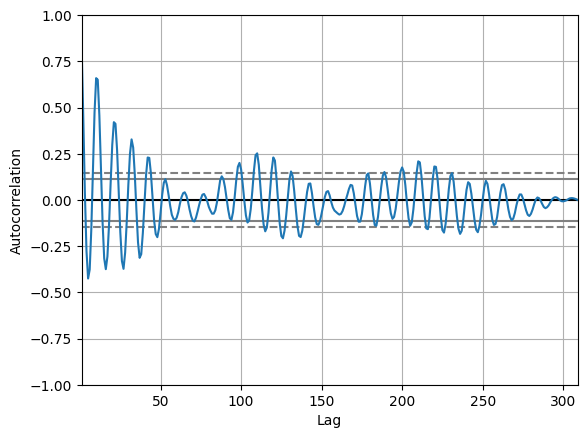

In [10]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df)


### Спробуємо провести прогноз за допомогою моделі SARIMAX

In [242]:
p = d = q = range(0, 3)
# Генеруємо різні комбінації p, q и q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 8) for x in list(itertools.product(p, d, q))] 


In [243]:
aic_res=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
            order=param,
            seasonal_order=param_seasonal,
            enforce_stationarity=False,
            enforce_invertibility=False)
            results = mod.fit()
            aic_res.append(results.aic)
            print('ARIMA{}x{}8 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            
print('Min AIC = ', min(aic_res))

ARIMA(0, 0, 0)x(0, 0, 0, 8)8 - AIC:3439.710598624912
ARIMA(0, 0, 0)x(0, 0, 1, 8)8 - AIC:3205.446512043939
ARIMA(0, 0, 0)x(0, 0, 2, 8)8 - AIC:3110.0591465876123
ARIMA(0, 0, 0)x(0, 1, 0, 8)8 - AIC:3230.6396121665125
ARIMA(0, 0, 0)x(0, 1, 1, 8)8 - AIC:3026.1709660688057
ARIMA(0, 0, 0)x(0, 1, 2, 8)8 - AIC:2918.960230444426
ARIMA(0, 0, 0)x(0, 2, 0, 8)8 - AIC:3393.532716414941
ARIMA(0, 0, 0)x(0, 2, 1, 8)8 - AIC:3094.1202923313735
ARIMA(0, 0, 0)x(0, 2, 2, 8)8 - AIC:2907.043559807342
ARIMA(0, 0, 0)x(1, 0, 0, 8)8 - AIC:3190.6153315519355
ARIMA(0, 0, 0)x(1, 0, 1, 8)8 - AIC:3100.953972983192
ARIMA(0, 0, 0)x(1, 0, 2, 8)8 - AIC:2999.118092686529
ARIMA(0, 0, 0)x(1, 1, 0, 8)8 - AIC:3153.5567333450335
ARIMA(0, 0, 0)x(1, 1, 1, 8)8 - AIC:3024.7640322813354
ARIMA(0, 0, 0)x(1, 1, 2, 8)8 - AIC:2912.6503112534415
ARIMA(0, 0, 0)x(1, 2, 0, 8)8 - AIC:3285.605730365684
ARIMA(0, 0, 0)x(1, 2, 1, 8)8 - AIC:3089.9117525202914
ARIMA(0, 0, 0)x(1, 2, 2, 8)8 - AIC:2908.037742786675
ARIMA(0, 0, 0)x(2, 0, 0, 8)8 - AIC:31

ARIMA(0, 1, 2)x(2, 0, 1, 8)8 - AIC:2577.4556098081953
ARIMA(0, 1, 2)x(2, 0, 2, 8)8 - AIC:2549.6348144376
ARIMA(0, 1, 2)x(2, 1, 0, 8)8 - AIC:2623.141919186003
ARIMA(0, 1, 2)x(2, 1, 1, 8)8 - AIC:2536.4499635845104
ARIMA(0, 1, 2)x(2, 1, 2, 8)8 - AIC:2511.3036380598105
ARIMA(0, 1, 2)x(2, 2, 0, 8)8 - AIC:2749.2407116529503
ARIMA(0, 1, 2)x(2, 2, 1, 8)8 - AIC:2587.219220864872
ARIMA(0, 1, 2)x(2, 2, 2, 8)8 - AIC:2491.082595414853
ARIMA(0, 2, 0)x(0, 0, 0, 8)8 - AIC:2790.324740405819
ARIMA(0, 2, 0)x(0, 0, 1, 8)8 - AIC:2718.7092900862453
ARIMA(0, 2, 0)x(0, 0, 2, 8)8 - AIC:2654.0062086331923
ARIMA(0, 2, 0)x(0, 1, 0, 8)8 - AIC:2951.978103023475
ARIMA(0, 2, 0)x(0, 1, 1, 8)8 - AIC:2677.5734867691
ARIMA(0, 2, 0)x(0, 1, 2, 8)8 - AIC:2606.0684688549945
ARIMA(0, 2, 0)x(0, 2, 0, 8)8 - AIC:3197.9606096173893
ARIMA(0, 2, 0)x(0, 2, 1, 8)8 - AIC:2830.2661707722827
ARIMA(0, 2, 0)x(0, 2, 2, 8)8 - AIC:2583.333364571942
ARIMA(0, 2, 0)x(1, 0, 0, 8)8 - AIC:2727.0987827091967
ARIMA(0, 2, 0)x(1, 0, 1, 8)8 - AIC:2720.

ARIMA(1, 0, 2)x(1, 0, 2, 8)8 - AIC:2544.064212918426
ARIMA(1, 0, 2)x(1, 1, 0, 8)8 - AIC:2667.9619487135597
ARIMA(1, 0, 2)x(1, 1, 1, 8)8 - AIC:2530.722492052151
ARIMA(1, 0, 2)x(1, 1, 2, 8)8 - AIC:2465.6381124468435
ARIMA(1, 0, 2)x(1, 2, 0, 8)8 - AIC:2819.7714585976228
ARIMA(1, 0, 2)x(1, 2, 1, 8)8 - AIC:2613.7864993785433
ARIMA(1, 0, 2)x(1, 2, 2, 8)8 - AIC:2444.7184393334223
ARIMA(1, 0, 2)x(2, 0, 0, 8)8 - AIC:2558.449561475877
ARIMA(1, 0, 2)x(2, 0, 1, 8)8 - AIC:2552.2756563752732
ARIMA(1, 0, 2)x(2, 0, 2, 8)8 - AIC:2536.1006431325977
ARIMA(1, 0, 2)x(2, 1, 0, 8)8 - AIC:2566.294178299549
ARIMA(1, 0, 2)x(2, 1, 1, 8)8 - AIC:2480.6750179789738
ARIMA(1, 0, 2)x(2, 1, 2, 8)8 - AIC:2466.6330001174533
ARIMA(1, 0, 2)x(2, 2, 0, 8)8 - AIC:2708.2304411894743
ARIMA(1, 0, 2)x(2, 2, 1, 8)8 - AIC:2531.6215831690247
ARIMA(1, 0, 2)x(2, 2, 2, 8)8 - AIC:2447.041858313554
ARIMA(1, 1, 0)x(0, 0, 0, 8)8 - AIC:2720.434994758174
ARIMA(1, 1, 0)x(0, 0, 1, 8)8 - AIC:2652.935610067003
ARIMA(1, 1, 0)x(0, 0, 2, 8)8 - AIC:

ARIMA(1, 2, 2)x(0, 1, 0, 8)8 - AIC:2853.1910232519585
ARIMA(1, 2, 2)x(0, 1, 1, 8)8 - AIC:2591.7376521493325
ARIMA(1, 2, 2)x(0, 1, 2, 8)8 - AIC:2519.470927849665
ARIMA(1, 2, 2)x(0, 2, 0, 8)8 - AIC:3085.556243505113
ARIMA(1, 2, 2)x(0, 2, 1, 8)8 - AIC:2735.642807075165
ARIMA(1, 2, 2)x(0, 2, 2, 8)8 - AIC:2564.677401073202
ARIMA(1, 2, 2)x(1, 0, 0, 8)8 - AIC:2645.2990144515534
ARIMA(1, 2, 2)x(1, 0, 1, 8)8 - AIC:2631.0300124942373
ARIMA(1, 2, 2)x(1, 0, 2, 8)8 - AIC:2565.4508311215436
ARIMA(1, 2, 2)x(1, 1, 0, 8)8 - AIC:2727.0645615175645
ARIMA(1, 2, 2)x(1, 1, 1, 8)8 - AIC:2593.277661827233
ARIMA(1, 2, 2)x(1, 1, 2, 8)8 - AIC:2520.5911208347834
ARIMA(1, 2, 2)x(1, 2, 0, 8)8 - AIC:2879.837436953137
ARIMA(1, 2, 2)x(1, 2, 1, 8)8 - AIC:2672.0562088626116
ARIMA(1, 2, 2)x(1, 2, 2, 8)8 - AIC:2501.2291904787626
ARIMA(1, 2, 2)x(2, 0, 0, 8)8 - AIC:2577.6660030820753
ARIMA(1, 2, 2)x(2, 0, 1, 8)8 - AIC:2579.428893135523
ARIMA(1, 2, 2)x(2, 0, 2, 8)8 - AIC:2557.6252010396056
ARIMA(1, 2, 2)x(2, 1, 0, 8)8 - AIC:

ARIMA(2, 1, 1)x(2, 1, 1, 8)8 - AIC:2427.641596780033
ARIMA(2, 1, 1)x(2, 1, 2, 8)8 - AIC:2426.789582685536
ARIMA(2, 1, 1)x(2, 2, 0, 8)8 - AIC:2602.350332206822
ARIMA(2, 1, 1)x(2, 2, 1, 8)8 - AIC:2467.4887834469205
ARIMA(2, 1, 1)x(2, 2, 2, 8)8 - AIC:2415.2340933476517
ARIMA(2, 1, 2)x(0, 0, 0, 8)8 - AIC:2552.661910468648
ARIMA(2, 1, 2)x(0, 0, 1, 8)8 - AIC:2483.8298023826137
ARIMA(2, 1, 2)x(0, 0, 2, 8)8 - AIC:2420.8103745412855
ARIMA(2, 1, 2)x(0, 1, 0, 8)8 - AIC:2719.152550212026
ARIMA(2, 1, 2)x(0, 1, 1, 8)8 - AIC:2448.9978731511246
ARIMA(2, 1, 2)x(0, 1, 2, 8)8 - AIC:2377.116753385907
ARIMA(2, 1, 2)x(0, 2, 0, 8)8 - AIC:2960.3927874664682
ARIMA(2, 1, 2)x(0, 2, 1, 8)8 - AIC:2611.056156425114
ARIMA(2, 1, 2)x(0, 2, 2, 8)8 - AIC:2361.4223733439585
ARIMA(2, 1, 2)x(1, 0, 0, 8)8 - AIC:2490.579996278779
ARIMA(2, 1, 2)x(1, 0, 1, 8)8 - AIC:2482.4277929802565
ARIMA(2, 1, 2)x(1, 0, 2, 8)8 - AIC:2422.8237005597557
ARIMA(2, 1, 2)x(1, 1, 0, 8)8 - AIC:2532.6711826577903
ARIMA(2, 1, 2)x(1, 1, 1, 8)8 - AIC:2

In [245]:
aic_res.index(2358.0335088150487), len(aic_res)

(647, 729)

In [246]:
mod = sm.tsa.statespace.SARIMAX(df,
order=(2, 1, 2),
seasonal_order=(2, 2, 2, 8),
enforce_stationarity=False,
enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6337      0.020     81.403      0.000       1.594       1.673
ar.L2         -0.9664      0.018    -53.236      0.000      -1.002      -0.931
ma.L1         -1.5691      0.051    -31.047      0.000      -1.668      -1.470
ma.L2          0.7173      0.050     14.227      0.000       0.618       0.816
ar.S.L8       -0.1931      0.066     -2.914      0.004      -0.323      -0.063
ar.S.L16       0.0395      0.050      0.793      0.428      -0.058       0.137
ma.S.L8       -1.9503      1.116     -1.747      0.081      -4.139       0.238
ma.S.L16       0.9525      1.054      0.904      0.366      -1.112       3.017
sigma2       246.3660    281.885      0.874      0.382    -306.118     798.850


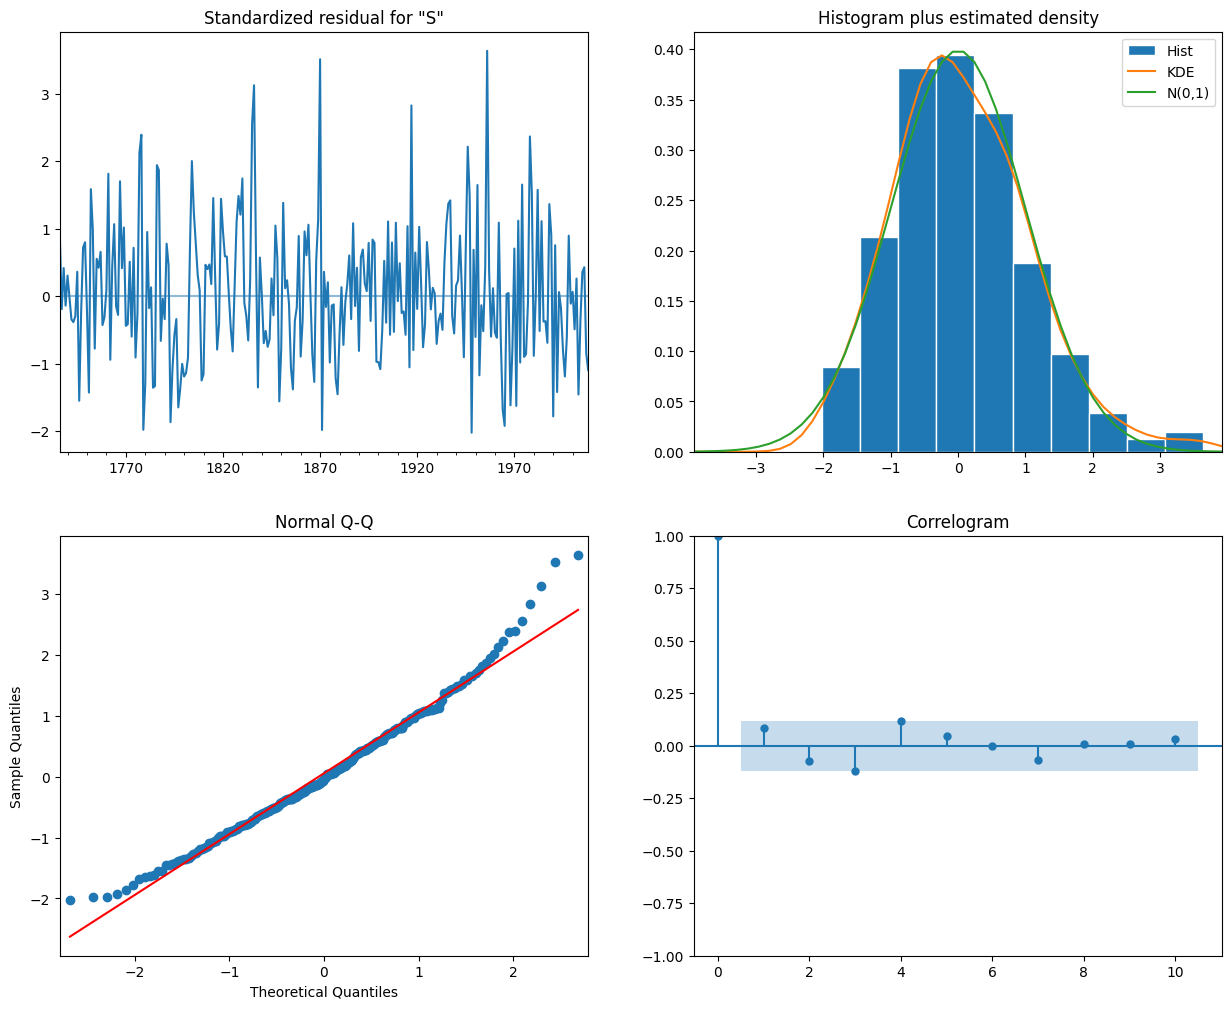

In [247]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

### Перевіримо роботу моделі на відомих даних за умови парамеру dynamic=False

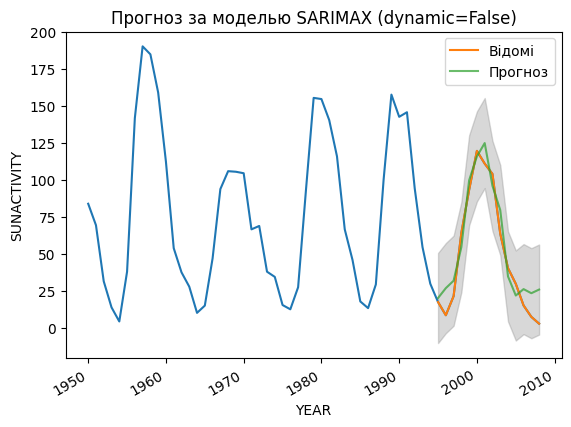

In [22]:
pred = results.get_prediction(start=pd.to_datetime('1995'), end=pd.to_datetime('2008'), dynamic=False)
pred_ci = pred.conf_int()

plt.plot(df['SUNACTIVITY']['1950':])
ax = df['SUNACTIVITY']['1995':].plot(label='Відомі')

pred.predicted_mean.plot(ax=ax, label='Прогноз', alpha=.7)
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='grey', alpha=.3)
ax.set_ylabel('SUNACTIVITY')
ax.set_title('Прогноз за моделью SARIMAX (dynamic=False)')
plt.legend()
plt.show()



In [23]:
y_forecasted = pred.predicted_mean
y_truth = df['SUNACTIVITY']['1995':] # Обчислюємо середню квадртичну похибку
mse = ((y_forecasted - y_truth) ** 2).mean()
print('Середня квадратна похибка прогнозів = {}'.format(round(mse, 2)))

Середня квадратна похибка прогнозів = 150.87


### Перевіримо роботу моделі на відомих даних за умови парамеру dynamic=True

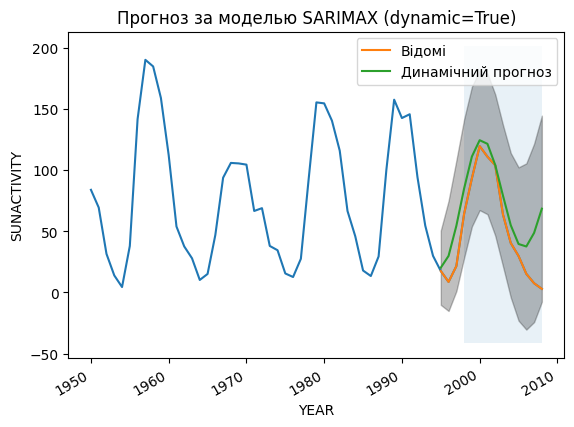

In [24]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1995'), end=pd.to_datetime('2008'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

plt.plot(df['SUNACTIVITY']['1950':])
ax = df['SUNACTIVITY']['1995':].plot(label='Відомі')
pred_dynamic.predicted_mean.plot(label='Динамічний прогноз', ax=ax)
ax.fill_between(pred_dynamic_ci.index,
pred_dynamic_ci.iloc[:, 0],
pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), df['SUNACTIVITY'].index[-1],
alpha=.1, zorder=-1)
ax.set_ylabel('SUNACTIVITY')
ax.set_title('Прогноз за моделью SARIMAX (dynamic=True)')
plt.legend()
plt.show()



In [25]:
y_forecasted = pred_dynamic.predicted_mean
y_truth = df['SUNACTIVITY']['1995':] # Обчислюємо середню квадртичну похибку
mse = ((y_forecasted - y_truth) ** 2).mean()
print('Середня квадратна похибка прогнозів = {}'.format(round(mse, 2)))

Середня квадратна похибка прогнозів = 675.98


### Динамічна модель прогнозування показує гірші показники

## Отримуємо прогноз з 2009 по 2030 років

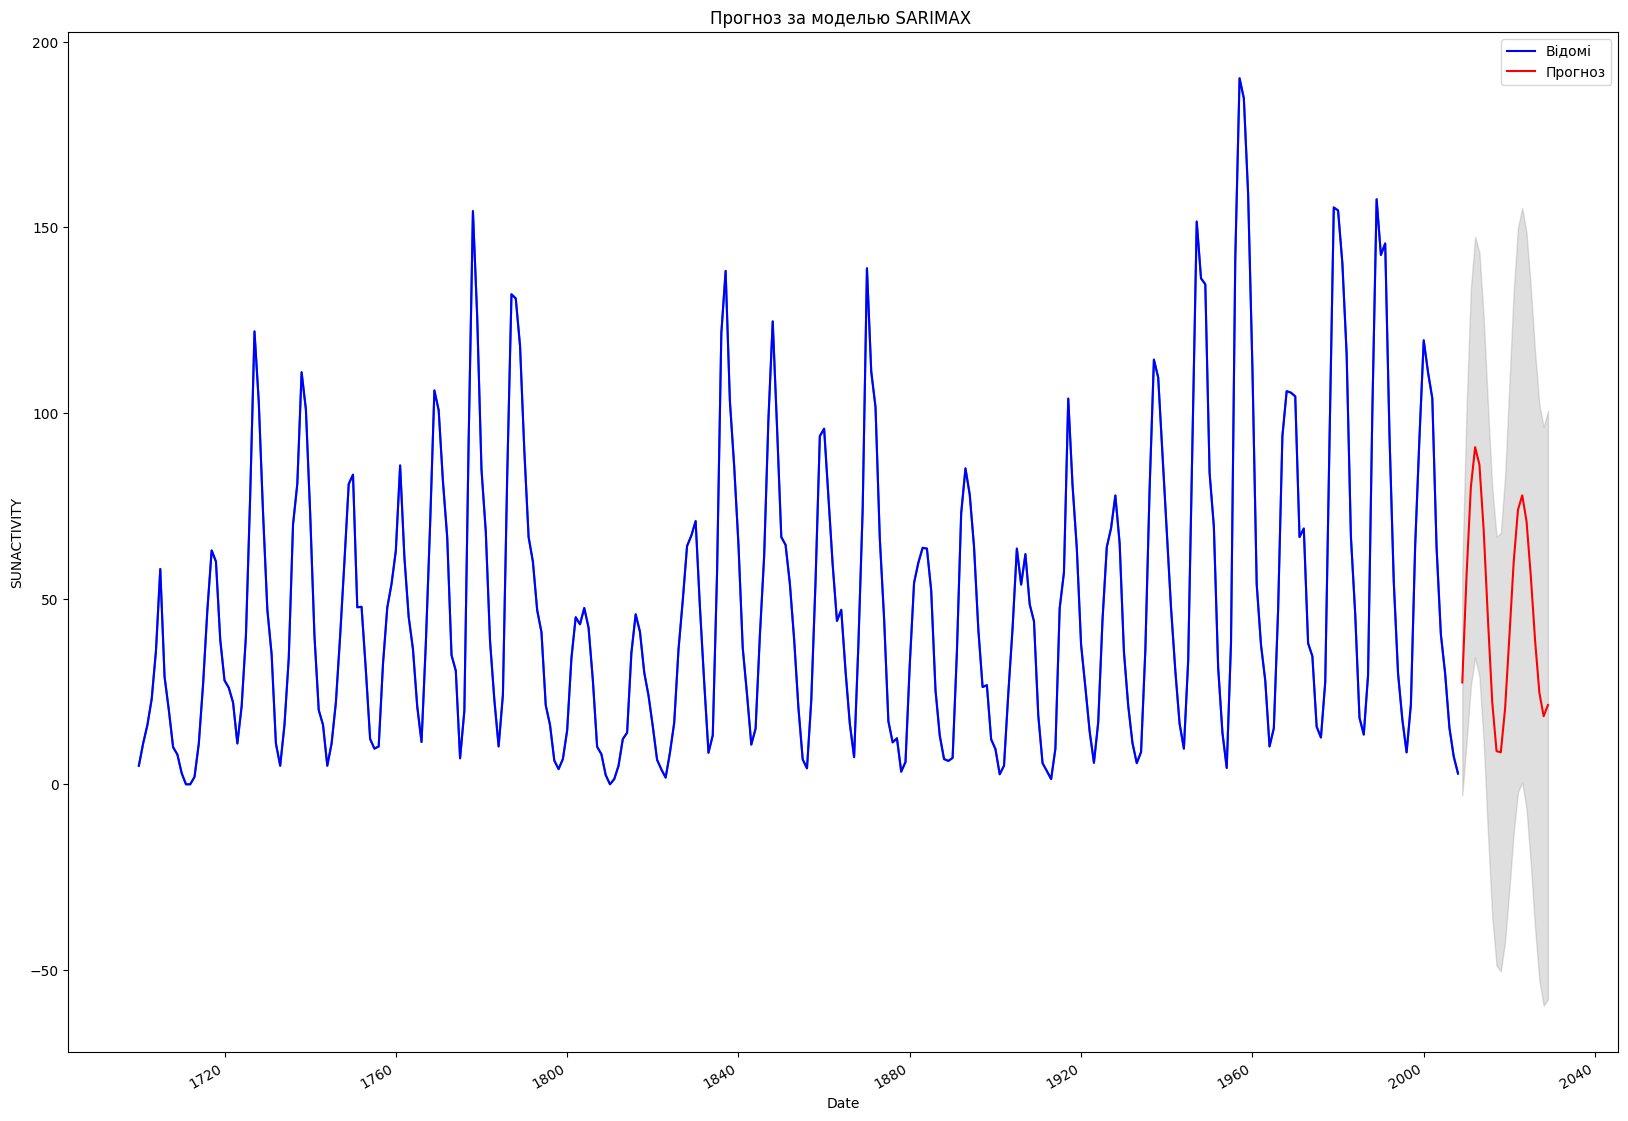

In [26]:
pred_uc = results.get_forecast(steps=21)
pred_ci = pred_uc.conf_int()

plt.plot(df['SUNACTIVITY'])
ax = df['SUNACTIVITY'][:].plot(label='Відомі', figsize=(20, 15),color='blue')
pred_uc.predicted_mean.plot(ax=ax, label='Прогноз',color='red')
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='grey', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('SUNACTIVITY')
ax.set_title('Прогноз за моделью SARIMAX ')
plt.legend()
plt.show()



### Отриманий прогноз має низький ступінь точності.
### Спробуємо провести прогноз за допомогою моделі ARIMA

In [30]:
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(df, order=(2, 1, 2))
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6098      0.026     61.536      0.000       1.559       1.661
ar.L2         -0.9381      0.023    -41.582      0.000      -0.982      -0.894
ma.L1         -1.5185      0.055    -27.634      0.000      -1.626      -1.411
ma.L2          0.6440      0.059     10.857      0.000       0.528       0.760
sigma2       240.9492     16.173     14.898      0.000     209.250     272.648


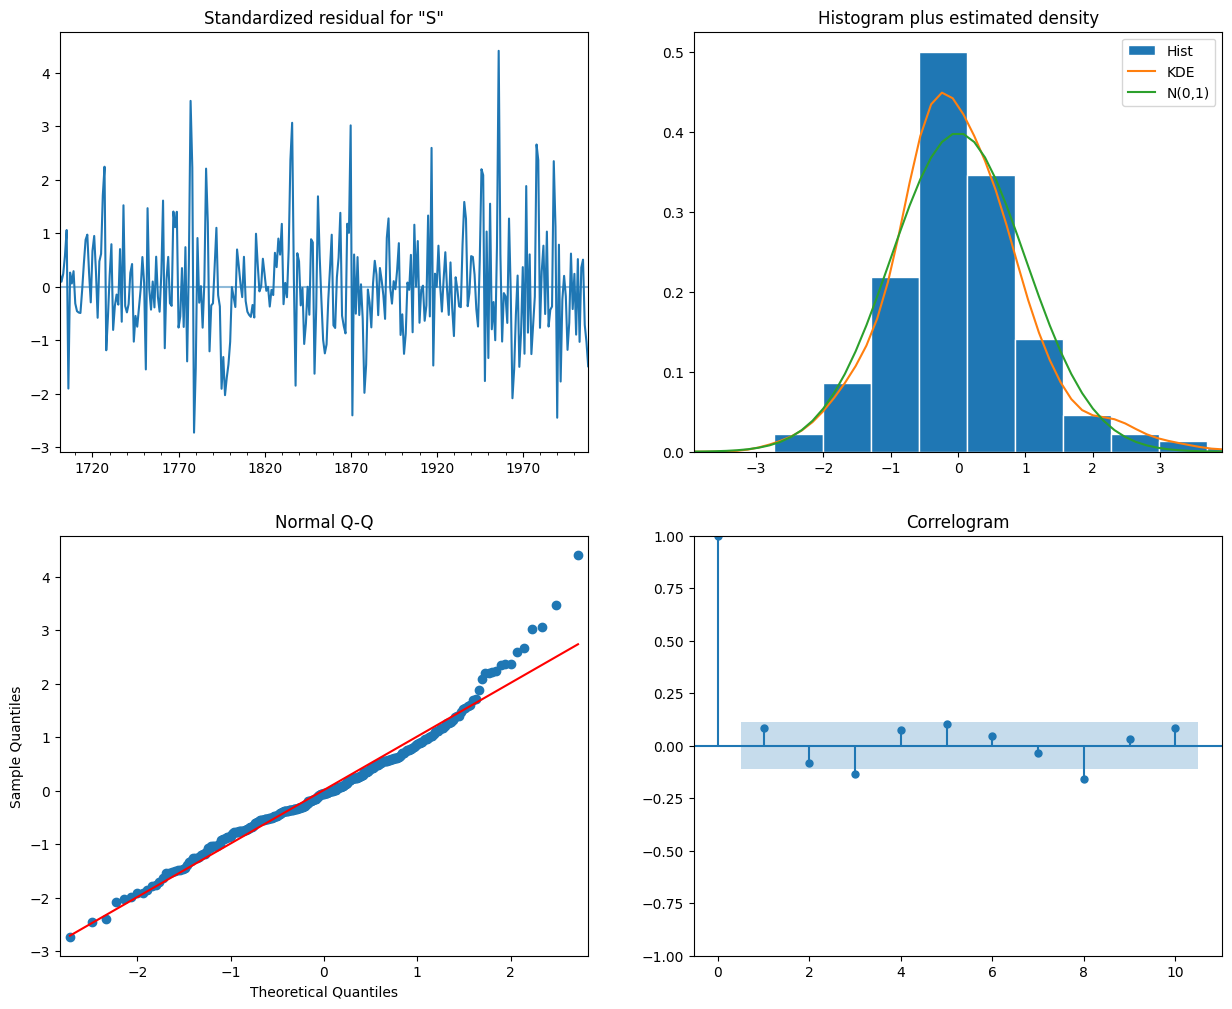

In [34]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()


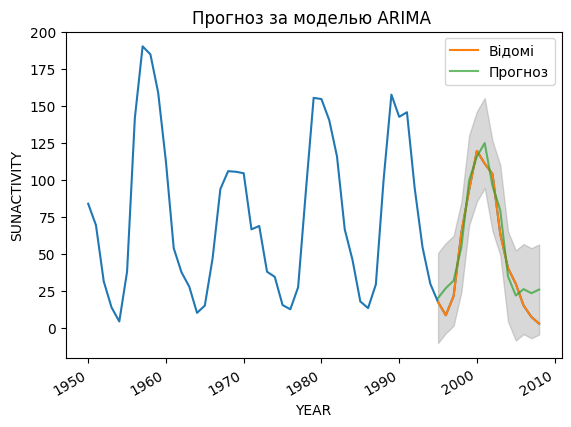

In [31]:
pred = results.get_prediction(start=pd.to_datetime('1995'), end=pd.to_datetime('2008'), dynamic=False)
pred_ci = pred.conf_int()

plt.plot(df['SUNACTIVITY']['1950':])
ax = df['SUNACTIVITY']['1995':].plot(label='Відомі')

pred.predicted_mean.plot(ax=ax, label='Прогноз', alpha=.7)
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='grey', alpha=.3)
ax.set_ylabel('SUNACTIVITY')
ax.set_title('Прогноз за моделью ARIMA ')
plt.legend()
plt.show()

In [32]:
y_forecasted = pred.predicted_mean
y_truth = df['SUNACTIVITY']['1995':] # Обчислюємо середню квадртичну похибку
mse = ((y_forecasted - y_truth) ** 2).mean()
print('Середня квадратна похибка прогнозів = {}'.format(round(mse, 2)))

Середня квадратна похибка прогнозів = 150.87


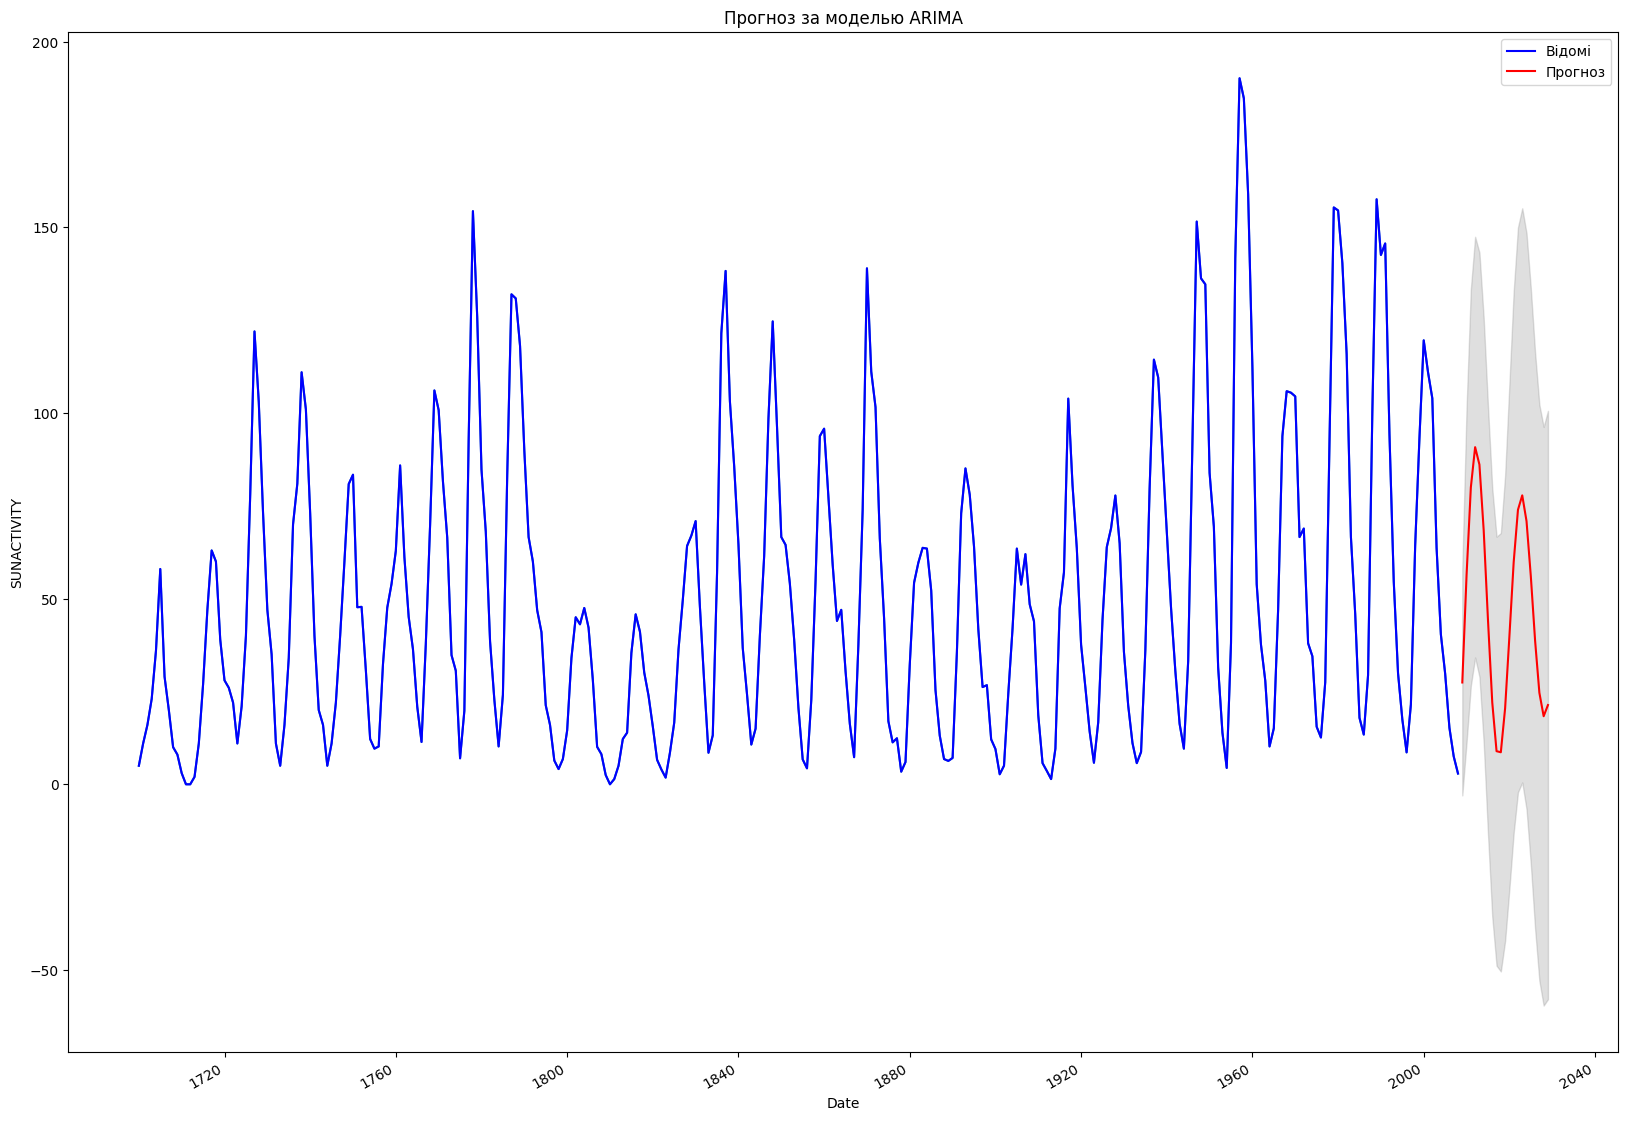

In [33]:
pred_uc = results.get_forecast(steps=21)
pred_ci = pred_uc.conf_int()

plt.plot(df['SUNACTIVITY'])
ax = df['SUNACTIVITY'][:].plot(label='Відомі', figsize=(20, 15), color='blue')
pred_uc.predicted_mean.plot(ax=ax, label='Прогноз',color='red')
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='grey', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('SUNACTIVITY')
ax.set_title('Прогноз за моделью ARIMA')
plt.legend()
plt.show()


### Висновки :
###  Отримані прогнози за моделями ARIMA і  SARIMAX практично не відрізняються та  мають низький ступінь точності.